Author: Ema Ilic

Having created Dimensionality Reduction Ema notebook experimenting with different techniques of DR, the next task calls for choosing two dimensions and conducting the classification task again on those. Finally, it calls for applying the Decision Boundary algorithm to every different classification method. 

All of the techniques which require k number of dimensions as a parameter (Univariate Feature Selection, ) or with a threshold which reduces the dataset to two dimensions (Variance Threshold) , when the number of dimensions yielded by the technique was two, showed the following two attributes to be the most relevant: Light and CO2.

In the DR Ema (experimenting with parameters) we only used the decision tree classifier.
Here on the other hand, we will only work two dimensional results and will apply different classifiers to the DR methods: namely, Decision Tree, KNN, NB and Logistic Regression.

Thanks to Lorenzo's work in classification_regression, we know the best hyperparameters for each classifier and therefore we are using those.

The only problem in the notebook: decision boundary doesn't work.

In [71]:
# set the output file name
#outFileName = 'Out_File_Name'

# set the path of the directory where your modules are
modulesPath = 'C:\\Users\\email\\Documents\\GitHub\\AdvDataMining\\__Repo__'

In [72]:
import os
import sys

if os.path.isdir(modulesPath) and modulesPath not in sys.path:
    sys.path.append(modulesPath)

modulesList = os.listdir(modulesPath)
print('Available Files and Modules for the project:', modulesList,sep='\n')


from collections import defaultdict
import itertools

%matplotlib inline

import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

import data_understanding
import data_preparation
import df_handle
import modeling
import model_evaluation

Available Files and Modules for the project:
['datatest.txt', 'datatest2.txt', 'datatraining.txt', 'data_preparation.py', 'data_understanding.py', 'df_handle.py', 'modeling.py', 'model_evaluation.py', '__pycache__']


In [73]:
df = df_handle.setup_df('datatraining.txt')

In [74]:
X_train, X_test, y_train, y_test = df_handle.setup_df('datatraining.txt', 'Occupancy', 'datatest.txt')
#X_Train are the dependent variables in the training set and y_train is the independent variable in the training test (Occupancy)

In [75]:
X_train.shape

(8143, 6)

In [76]:
del X_train['date']
del X_test['date']

In [77]:
head, tail, objectsN, attributesN, types, missValues, nullValues = data_understanding.dataset_state(df)

statistics, pearson_corr, spearman_corr, kendall_corr = data_understanding.numeric_columns_stats(df)

# Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

clf = DecisionTreeClassifier(min_samples_leaf=129, random_state=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

**Variance Threshold**


In [79]:
from sklearn.feature_selection import VarianceThreshold

In [80]:
#While the threshold in <=30, the variables yielded are 3. If the threshold is more than 30, the variables yielded are 2.
sel = VarianceThreshold(threshold=31)
X_train_sel = sel.fit_transform(X_train)

X_train_sel.shape

(8143, 2)

In [81]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=129, random_state=100)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9786116322701689
F1-score [0.98290855 0.97142857]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



**Univariate Feature Selection**

In [82]:
from sklearn.feature_selection import SelectKBest

In [83]:
sel = SelectKBest(k=2)
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape

(8143, 2)

In [84]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=129, random_state=100)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9786116322701689
F1-score [0.98290855 0.97142857]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



In [85]:
X_test_sel

array([[ 585.2       ,  749.2       ],
       [ 578.4       ,  760.4       ],
       [ 572.66666667,  769.66666667],
       ...,
       [ 817.        , 1125.8       ],
       [ 813.        , 1123.        ],
       [ 798.        , 1124.        ]])

**Recursive Feature Elimination** is of no use in this notebook as it doesn't take a parameter - i.e. it recursively selects the number of dimensions which gives the best results - the result is however one and it therefore doesn't concern this notebook (which is regarding two dimensions)

**PCA**

In [86]:
from sklearn.decomposition import PCA

In [87]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_train_pca.shape

(8143, 2)

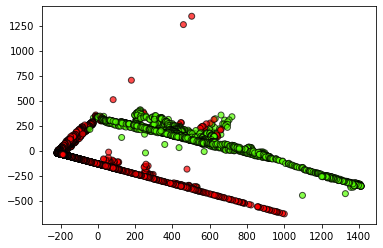

In [88]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [89]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=129, random_state=100)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.975234521575985
F1-score [0.98025135 0.9668008 ]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.97      2665
weighted avg       0.98      0.98      0.98      2665



**SVD**

In [90]:
from sklearn.decomposition import TruncatedSVD

In [91]:
#K=2
svd = TruncatedSVD(n_components=2)
svd.fit(X_train)
X_train_svd = svd.transform(X_train)

In [134]:
X_train_svd

array([[804.95685337, 234.13228052],
       [798.80149082, 239.29621932],
       [797.4523997 , 236.03081535],
       ...,
       [881.71279116, 221.67167681],
       [902.85514931, 216.3214571 ],
       [906.95568326, 229.71598568]])

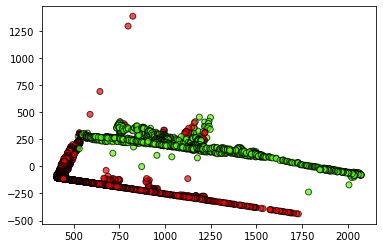

In [92]:
plt.scatter(X_train_svd[:, 0], X_train_svd[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [93]:
X_test_svd = svd.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=129, random_state=100)
clf.fit(X_train_svd, y_train)

y_pred = clf.predict(X_test_svd)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9703564727954972
F1-score [0.97614014 0.96087172]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1693
           1       0.93      1.00      0.96       972

    accuracy                           0.97      2665
   macro avg       0.96      0.98      0.97      2665
weighted avg       0.97      0.97      0.97      2665



**Decision Boundary**

In [137]:
X_train_svd_df=pd.DataFrame(X_train_svd)

In [139]:
model_evaluation.decision_boundary_scatterplots(X_train_svd_df, y_train, clf)

MemoryError: 

**Plot the dataset in the two new dimensions**

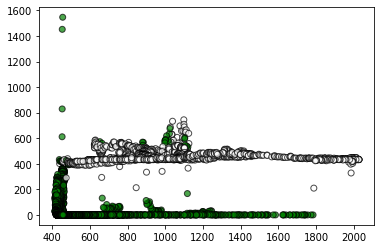

In [97]:
plt.scatter(df['CO2'], df['Light'], c=df['Occupancy'], cmap=plt.cm.ocean, edgecolor='k', alpha=0.7)
plt.show()

# KNN Classifier

In [98]:
from sklearn.neighbors import KNeighborsClassifier

**Variance Threshold**

In [99]:
#While the threshold in <=30, the variables yielded are 3. If the threshold is more than 30, the variables yielded are 2.
sel = VarianceThreshold(threshold=31)
X_train_sel = sel.fit_transform(X_train)

In [100]:
X_test_sel = sel.transform(X_test)

clf = KNeighborsClassifier(weights='uniform', n_neighbors=26)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9782363977485928
F1-score [0.98261391 0.97091274]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



**Univariate Feature Selection**

In [101]:
sel = SelectKBest(k=2)
X_train_sel = sel.fit_transform(X_train, y_train)


In [102]:
X_test_sel = sel.transform(X_test)

clf = KNeighborsClassifier(weights='uniform', n_neighbors=26)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9782363977485928
F1-score [0.98261391 0.97091274]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



**PCA**

In [130]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [131]:
X_test_pca = pca.transform(X_test)

clf = KNeighborsClassifier(weights='uniform', n_neighbors=26)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9782363977485928
F1-score [0.98261391 0.97091274]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



In [132]:
pca = PCA(n_components=3)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [133]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=129, random_state=100)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9786116322701689
F1-score [0.98290855 0.97142857]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



**SVD**

In [105]:
svd = TruncatedSVD(n_components=2)
svd.fit(X_train)
X_train_svd = svd.transform(X_train)

In [106]:
X_test_svd = svd.transform(X_test)

clf = KNeighborsClassifier(weights='uniform', n_neighbors=26)
clf.fit(X_train_svd, y_train)

y_pred = clf.predict(X_test_svd)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9782363977485928
F1-score [0.98261391 0.97091274]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



**Decision Boundary**

In [107]:
#model_evaluation.decision_boundary_scatterplots(X_test_2D, y_test, clf)

# Naive Bayes Classifier

In [108]:
from sklearn.naive_bayes import GaussianNB

In [109]:
#seleziona il modello
clf = GaussianNB()

#fitta il modello
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

**Variance Threshold**

In [110]:
#While the threshold in <=30, the variables yielded are 3. If the threshold is more than 30, the variables yielded are 2.
sel = VarianceThreshold(threshold=31)
X_train_sel = sel.fit_transform(X_train)

In [111]:
X_test_sel = sel.transform(X_test)
clf.fit(X_train_sel, y_train)
y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9771106941838649
F1-score [0.98172011 0.96939288]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



**Univariate Feature Selection**

In [112]:
sel = SelectKBest(k=2)
X_train_sel = sel.fit_transform(X_train, y_train)


In [113]:
X_test_sel = sel.transform(X_test)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9771106941838649
F1-score [0.98172011 0.96939288]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



**Principal Component Analysis**

In [114]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [115]:
X_test_sel = sel.transform(X_test)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))


Accuracy 0.9771106941838649
F1-score [0.98172011 0.96939288]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



**SVD**

In [116]:
svd = TruncatedSVD(n_components=2)
svd.fit(X_train)
X_train_svd = svd.transform(X_train)

In [117]:
X_test_sel = sel.transform(X_test)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))


Accuracy 0.9771106941838649
F1-score [0.98172011 0.96939288]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



**Decision Boundary**

In [118]:
#model_evaluation.decision_boundary_scatterplots(X_test_2D, y_test, clf)

# Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
#seleziona il modello
clf = LogisticRegression(random_state=0)

#fitta il modello
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**Variance Threshold**

In [121]:
#While the threshold in <=30, the variables yielded are 3. If the threshold is more than 30, the variables yielded are 2.
sel = VarianceThreshold(threshold=31)
X_train_sel = sel.fit_transform(X_train)

In [122]:
X_test_sel = sel.transform(X_test)
clf.fit(X_train_sel, y_train)
y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9782363977485928
F1-score [0.98260348 0.97094188]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Univariate Feature Selection**

In [123]:
sel = SelectKBest(k=2)
X_train_sel = sel.fit_transform(X_train, y_train)


In [124]:
X_test_sel = sel.transform(X_test)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9782363977485928
F1-score [0.98260348 0.97094188]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**PCA**

In [125]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [126]:
X_test_sel = sel.transform(X_test)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))


Accuracy 0.9782363977485928
F1-score [0.98260348 0.97094188]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**SVD**

In [127]:
svd = TruncatedSVD(n_components=2)
svd.fit(X_train)
X_train_svd = svd.transform(X_train)

In [128]:
X_test_sel = sel.transform(X_test)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))


Accuracy 0.9782363977485928
F1-score [0.98260348 0.97094188]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Decision Boundary**

In [129]:
#model_evaluation.decision_boundary_scatterplots(X_test_2D, y_test, clf)

It is important to observe how all of the DR methods, when k=2 used as a parameter (UFS, PCA, SVD) or when  the variance threshold was such to yield 2 dimensions (Variance Threshold), selected Light and CO2 as the most useful two attributes.
We can tell that because when we type X_test_sel as a command, we get a twodimensional array with value cca 700 in the first column and values cca 400   in the second.
These values correspond only to CO2 and Light, respectively.